In [11]:
import numpy as np
import matplotlib.pyplot as plt

## data from experimental data (reproduced from the paper)

In [12]:
l23_l5=np.array([
[1.3380327868852468, 36.496350364963575],
[1.183278688524588, 43.06569343065695],
[1.5701639344262297, 96.3503649635037],
[2.4793442622950828, 98.54014598540147],
[2.5760655737704923, 97.08029197080299],
[3.001639344262294, 107.29927007299273],
[2.7888524590163932, 48.90510948905114],
[3.5819672131147513, 59.854014598540175],
[4.181639344262297, 103.64963503649636],
[4.994098360655737, 135.76642335766422],
[5.032786885245901, 104.37956204379566],
[5.9032786885245905, 129.92700729927014]])

l23_l5=np.array([
[0.23611319739948486, 36.496350364963575],
[0.2120704849881367, 43.06569343065695],
[0.27738330061486716, 96.3503649635037],
[0.5213033361402681, 98.54014598540147],
[0.557494419862081, 97.08029197080299],
[0.7490324191085013, 107.29927007299273],
[0.6462053806250656, 48.90510948905114],
[1.1204713026646447, 59.854014598540175],
[1.6987554576653126, 103.64963503649636],
[2.985321008416424, 135.76642335766422],
[3.0665570268519473, 104.37956204379566],
[5.610495648755357, 129.92700729927014],

])

In [13]:
m, b = np.polyfit(np.log(l23_l5[:,0]), l23_l5[:,1], 1)

/tmp/ipykernel_21083/3562897638.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,10)


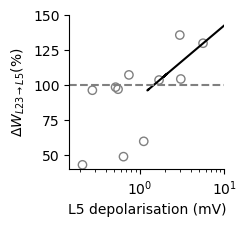

In [16]:
fig, ax = plt.subplots(figsize=(2,2))
ax.scatter(l23_l5[:,0], l23_l5[:,1], edgecolors='gray', facecolors='none')
plt.plot(np.exp(l23_l5[:,0]), m*l23_l5[:,0] + b, c='black')
ax.set_xscale('log')
# ax.set_xlim(0,4)
ax.set_xlabel('L5 depolarisation (mV)')
ax.set_ylabel(r'$\Delta W_{L23 \rightarrow L5} (\%)$')
ax.axhline(y=100, color='gray', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(40,150)
ax.set_xlim(0,10)

# ax.set_xticklabels([])
# ax.set_xticks([])
# ax.set_yticklabels([])
# ax.set_yticks([])
plt.savefig('saved_figs/fig1_learning_rule_experiment.svg', dpi=300, bbox_inches='tight',  transparent=True)

## model

In [13]:
# ssl_loss = (L5 - W*L23)^2
# deltaW = (L5-W*L23)*L23
import math

def sigmoid(x):
    print(x.shape)
    return 1 / (1 + np.exp(-x))

In [7]:
l23 = 0.5
l5 =np.random.uniform(0,1,20)

# pred =np.random.randn(*l23.shape)
W = 1
deltaW= (l5 - W*l23)*l23 + 0.05*np.random.randn(*l5.shape)

m, b = np.polyfit(l5, deltaW, 1)

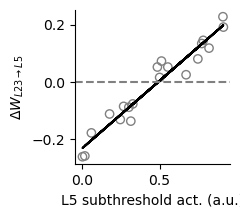

In [9]:
fig, ax = plt.subplots(figsize=(2,2))
ax.scatter(l5, deltaW, edgecolors='gray', facecolors='none')
plt.plot(l5, m*l5 + b, c='black')

ax.set_xlabel('L5 subthreshold act. (a.u.)')
ax.set_ylabel(r'$\Delta W_{L23 \rightarrow L5}$')
# ax.set_xlim(0,0.5)
ax.axhline(y=0, color='gray', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('saved_figs/fig1_learning_rule_model.svg', dpi=300, bbox_inches='tight', transparent=True)